Import Dependencies

In [1]:
import tensorflow as tf
import os
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

import os
import numpy as np
import math
import timeit
import matplotlib.pyplot as plt

%matplotlib inline

Folder  
├── train  
│   ├── anhgoc  
│   ├── catghep  
│   ├── doimau  
│   ├── saochep  
│   ├── tutanh  
│   └── xoay  
├── val  
│   ├── anhgoc  
│   ├── catghep  
│   ├── doimau  
│   ├── saochep  
│   ├── tutanh  
│   └── xoay  
└── test  
    ├── anhgoc  
    ├── catghep  
    ├── doimau  
    ├── saochep  
    ├── tutanh  
    └── xoay  


In [16]:
from os import makedirs, listdir
from shutil import copyfile
from random import seed, random

dataset_home = r'D:\dungnd\data\Folder'
subdirs = ['train', 'val', 'test']
for subdir in subdirs:
    # Create label subdirectories
    labeldirs = ['anhgoc', 'catghep', 'doimau', 'saochep', 'tutanh', 'xoay']
    for labldir in labeldirs:
        newdir = os.path.join(dataset_home, subdir, labldir)
        makedirs(newdir, exist_ok=True)



In [17]:
anhgoc_folder = r'D:\dungnd\data\USB\anhgoc'
catghep_folder = r'D:\dungnd\data\USB\catghep'
doimau_folder = r'D:\dungnd\data\USB\doimau'
saochep_folder = r'D:\dungnd\data\USB\saochep'
tutanh_folder = r'D:\dungnd\data\USB\tutanh'
xoay_folder = r'D:\dungnd\data\USB\xoay'

anhgoc_files = []
catghep_files = []
doimau_files = []
saochep_files = []
tutanh_files = []
xoay_files = []

for file in listdir(anhgoc_folder): 
    anhgoc_files.append(file)
for file in listdir(catghep_folder): 
    catghep_files.append(file)
for file in listdir(doimau_folder): 
    doimau_files.append(file)
for file in listdir(saochep_folder): 
    saochep_files.append(file)
for file in listdir(tutanh_folder): 
    tutanh_files.append(file)
for file in listdir(xoay_folder): 
    xoay_files.append(file)




print(len(anhgoc_files))
print(len(catghep_files))
print(len(doimau_files))
print(len(saochep_files))
print(len(tutanh_files))
print(len(xoay_files))

961
1101
1117
1038
1102
1046


In [18]:
def train_validate_test_split(data, train_percent=.7, validate_percent=.2, seed=None):
    np.random.seed(seed)
    perm = np.random.permutation(np.arange(len(data)))
    m = len(data)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end

    train = np.array(data)[perm[:train_end]].copy()
    validate = np.array(data)[perm[train_end:validate_end]].copy()
    test = np.array(data)[perm[validate_end:]].copy()
    return train, validate, test

In [19]:
def delete_files_in_directory(directory_path):
   try:
     files = os.listdir(directory_path)
     for file in files:
       file_path = os.path.join(directory_path, file)
       if os.path.isfile(file_path):
         os.remove(file_path)
     print("All files deleted successfully.")
   except OSError:
     print("Error occurred while deleting files.")

for subdir in subdirs:
  labeldirs = ['anhgoc', 'catghep', 'doimau', 'saochep', 'tutanh', 'xoay']
  for labldir in labeldirs:
    dir = os.path.join(dataset_home, subdir, labldir)
    print(dir)
    delete_files_in_directory(dir)

D:\dungnd\data\Folder\train\anhgoc
All files deleted successfully.
D:\dungnd\data\Folder\train\catghep
All files deleted successfully.
D:\dungnd\data\Folder\train\doimau
All files deleted successfully.
D:\dungnd\data\Folder\train\saochep
All files deleted successfully.
D:\dungnd\data\Folder\train\tutanh
All files deleted successfully.
D:\dungnd\data\Folder\train\xoay
All files deleted successfully.
D:\dungnd\data\Folder\val\anhgoc
All files deleted successfully.
D:\dungnd\data\Folder\val\catghep
All files deleted successfully.
D:\dungnd\data\Folder\val\doimau
All files deleted successfully.
D:\dungnd\data\Folder\val\saochep
All files deleted successfully.
D:\dungnd\data\Folder\val\tutanh
All files deleted successfully.
D:\dungnd\data\Folder\val\xoay
All files deleted successfully.
D:\dungnd\data\Folder\test\anhgoc
All files deleted successfully.
D:\dungnd\data\Folder\test\catghep
All files deleted successfully.
D:\dungnd\data\Folder\test\doimau
All files deleted successfully.
D:\dungnd

In [ ]:
train_anhgoc, val_anhgoc, test_anhgoc = train_validate_test_split(anhgoc_files, seed=42, train_percent=.7, validate_percent=.2)
train_catghep, val_catghep, test_catghep = train_validate_test_split(catghep_files, seed=42, train_percent=.7, validate_percent=.2)
train_doimau, val_doimau, test_doimau = train_validate_test_split(doimau_files, seed=42, train_percent=.7, validate_percent=.2)
train_saochep, val_saochep, test_saochep = train_validate_test_split(saochep_files, seed=42, train_percent=.7, validate_percent=.2)
train_tutanh, val_tutanh, test_tutanh = train_validate_test_split(tutanh_files, seed=42, train_percent=.7, validate_percent=.2)
train_xoay, val_xoay, test_xoay = train_validate_test_split(xoay_files, seed=42, train_percent=.7, validate_percent=.2)

# anhgoc
list(map(lambda file: copyfile(anhgoc_folder + '\\' + file, dataset_home + '\\train\\anhgoc\\' + file), train_anhgoc))
list(map(lambda file: copyfile(anhgoc_folder + '\\' + file, dataset_home + '\\val\\anhgoc\\' + file), val_anhgoc))
list(map(lambda file: copyfile(anhgoc_folder + '\\' + file, dataset_home + '\\test\\anhgoc\\' + file), test_anhgoc))

# catghep
list(map(lambda file: copyfile(catghep_folder + '\\' + file, dataset_home + '\\train\\catghep\\' + file), train_catghep))
list(map(lambda file: copyfile(catghep_folder + '\\' + file, dataset_home + '\\val\\catghep\\' + file), val_catghep))
list(map(lambda file: copyfile(catghep_folder + '\\' + file, dataset_home + '\\test\\catghep\\' + file), test_catghep))

# doimau
list(map(lambda file: copyfile(doimau_folder + '\\' + file, dataset_home + '\\train\\doimau\\' + file), train_doimau))
list(map(lambda file: copyfile(doimau_folder + '\\' + file, dataset_home + '\\val\\doimau\\' + file), val_doimau))
list(map(lambda file: copyfile(doimau_folder + '\\' + file, dataset_home + '\\test\\doimau\\' + file), test_doimau))

# saochep
list(map(lambda file: copyfile(saochep_folder + '\\' + file, dataset_home + '\\train\\saochep\\' + file), train_saochep))
list(map(lambda file: copyfile(saochep_folder + '\\' + file, dataset_home + '\\val\\saochep\\' + file), val_saochep))
list(map(lambda file: copyfile(saochep_folder + '\\' + file, dataset_home + '\\test\\saochep\\' + file), test_saochep))

# tutanh
list(map(lambda file: copyfile(tutanh_folder + '\\' + file, dataset_home + '\\train\\tutanh\\' + file), train_tutanh))
list(map(lambda file: copyfile(tutanh_folder + '\\' + file, dataset_home + '\\val\\tutanh\\' + file), val_tutanh))
list(map(lambda file: copyfile(tutanh_folder + '\\' + file, dataset_home + '\\test\\tutanh\\' + file), test_tutanh))

# xoay
list(map(lambda file: copyfile(xoay_folder + '\\' + file, dataset_home + '\\train\\xoay\\' + file), train_xoay))
list(map(lambda file: copyfile(xoay_folder + '\\' + file, dataset_home + '\\val\\xoay\\' + file), val_xoay))
list(map(lambda file: copyfile(xoay_folder + '\\' + file, dataset_home + '\\test\\xoay\\' + file), test_xoay))


In [38]:
data_dir = 'D:\\dungnd\\data\\Folder'

train_data = os.path.join(data_dir,'train')
valid_data = os.path.join(data_dir,'val')
test_data = os.path.join(data_dir,'test')

class_names = ['anhgoc', 'catghep', 'doimau', 'saochep', 'tutanh', 'xoay']

# image_size = (1024, 1024)

train = tf.keras.utils.image_dataset_from_directory(train_data,class_names=class_names, follow_links=True, shuffle=False, image_size=image_size)
valid = tf.keras.utils.image_dataset_from_directory(valid_data,class_names=class_names, follow_links=True, shuffle=False, image_size=image_size)
test = tf.keras.utils.image_dataset_from_directory(test_data,class_names=class_names, follow_links=True, shuffle=False, image_size=image_size)

Found 4452 files belonging to 6 classes.
Found 1271 files belonging to 6 classes.
Found 641 files belonging to 6 classes.


In [ ]:
train = train.map(lambda x,y: (x/255, y))
valid = valid.map(lambda x,y: (x/255, y))

In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

for gpu in tf.config.experimental.list_physical_devices('GPU'):
    tf.compat.v2.config.experimental.set_memory_growth(gpu, True)

def build_model():
    model = Sequential()

    model.add(Conv2D(64, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block1_conv1', input_shape=(256, 256, 3)))
    model.add(Conv2D(64, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block1_conv2'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), name='block1_maxpool'))

    model.add(Conv2D(128, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block2_conv1'))
    model.add(Conv2D(128, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block2_conv2'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), name='block2_maxpool'))

    model.add(Conv2D(256, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block3_conv1'))
    model.add(Conv2D(256, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block3_conv2'))
    model.add(Conv2D(256, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block3_conv3'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), name='block3_maxpool'))

    model.add(Conv2D(512, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block4_conv1'))
    model.add(Conv2D(512, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block4_conv2'))
    model.add(Conv2D(512, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block4_conv3'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), name='block4_maxpool'))

    model.add(Conv2D(512, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block5_conv1'))
    model.add(Conv2D(512, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block5_conv2'))
    model.add(Conv2D(512, (3,3), activation="relu", padding="same", kernel_initializer='he_uniform', name='block5_conv3'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), name='block5_maxpool'))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(6, activation='softmax'))

    return model

In [48]:
model = build_model()
learning_rate = 1e-4

model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_maxpool (MaxPooling  (None, 128, 128, 64)      0         
 2D)                                                             
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_maxpool (MaxPooling  (None, 64, 64, 128)       0         
 2D)                                                  

In [49]:
checkpoint_filepath = 'checkpoint//usb_data_checkpoint//model_epoch_{epoch:02d}_val_accuracy_{val_accuracy:.2f}.h5'
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min', #minimize the loss value
    save_best_only=True)

hist = model.fit(train, epochs=20, validation_data=valid, callbacks=[checkpoint_cb])

Epoch 1/20




140/140 [==============================] - 992s 7s/step - loss: 3623.7109 - accuracy: 0.7821 - val_loss: 58.8412 - val_accuracy: 0.1644
Epoch 2/20
140/140 [==============================] - 982s 7s/step - loss: 3.4576 - accuracy: 0.6817 - val_loss: 4.0350 - val_accuracy: 0.1644
Epoch 3/20
140/140 [==============================] - 926s 7s/step - loss: 1.6678 - accuracy: 0.3419 - val_loss: 23.3137 - val_accuracy: 0.1644
Epoch 4/20
140/140 [==============================] - 944s 7s/step - loss: 2.3736 - accuracy: 0.6406 - val_loss: 25.3999 - val_accuracy: 0.1644
Epoch 5/20
140/140 [==============================] - 931s 7s/step - loss: 1.9608 - accuracy: 0.6161 - val_loss: 17.0002 - val_accuracy: 0.1644
Epoch 6/20
140/140 [==============================] - 914s 7s/step - loss: 1.9238 - accuracy: 0.4513 - val_loss: 8.7771 - val_accuracy: 0.1644
Epoch 7/20
140/140 [==============================] - 927s 7s/step - loss: 1.5065 - accuracy: 0.5795 - val_loss: 24.8251 - val_accuracy: 0.1644


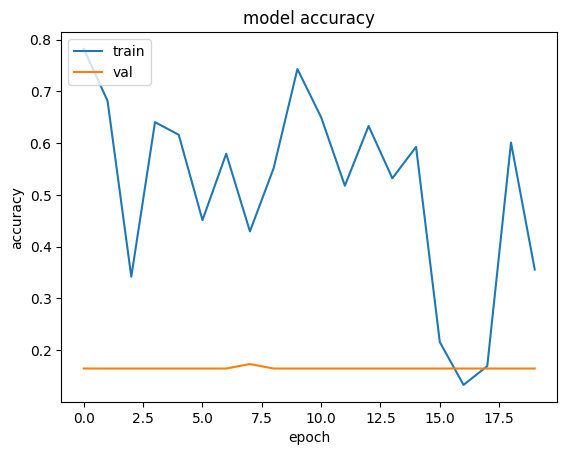

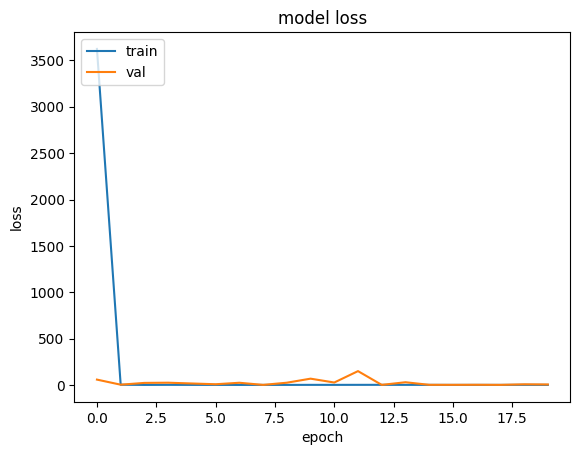

In [50]:
import sys
import matplotlib.pyplot as plt

def summarize_diagnostics(history):

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

summarize_diagnostics(hist)

In [51]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [60]:
model.load_weights(r'D:\dungnd\GraduationProject\notebook\checkpoint\usb_data_checkpoint\model_epoch_08_val_accuracy_0.17.h5')

# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(test)

21/21 [==============================] - 21s 971ms/step - loss: 1.7994 - accuracy: 0.1732


In [61]:
precision = Precision()
recall = Recall()
accuracy_metric = BinaryAccuracy()

In [62]:
y_pred_list = []
y_true_list = []

# Iterate over the test dataset to make predictions and accumulate true labels
for x, y_true in test:
    y_pred = model.predict(x)
    y_pred_list.extend(tf.argmax(y_pred, axis=1).numpy())
    y_true_list.extend(y_true.numpy())

1/1 [==============================] - 0s 165ms/step


In [63]:
precision.update_state(y_true_list, y_pred_list)
recall.update_state(y_true_list, y_pred_list)
accuracy_metric.update_state(y_true_list, y_pred_list)


precision_result = precision.result().numpy()
recall_result = recall.result().numpy()
accuracy_result = accuracy_metric.result().numpy()

print("Precision:", precision_result)
print("Recall:", recall_result)
print("Accuracy:", accuracy_result)

Precision: 0.84867394
Recall: 1.0
Accuracy: 0.17316693


In [64]:
from sklearn.metrics import classification_report
class_names

['anhgoc', 'catghep', 'doimau', 'saochep', 'tutanh', 'xoay']

In [65]:
print(classification_report(y_true_list, y_pred_list, target_names=class_names))

              precision    recall  f1-score   support

      anhgoc       0.00      0.00      0.00        97
     catghep       0.00      0.00      0.00       111
      doimau       0.00      0.00      0.00       113
     saochep       0.00      0.00      0.00       105
      tutanh       0.17      1.00      0.30       111
        xoay       0.00      0.00      0.00       104

    accuracy                           0.17       641
   macro avg       0.03      0.17      0.05       641
weighted avg       0.03      0.17      0.05       641



c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,